Solution by Tushar Roy:
https://www.youtube.com/watch?v=nYFd7VHKyWQ

Even better algorithm @ https://www.youtube.com/watch?v=0TgbziCDGgw
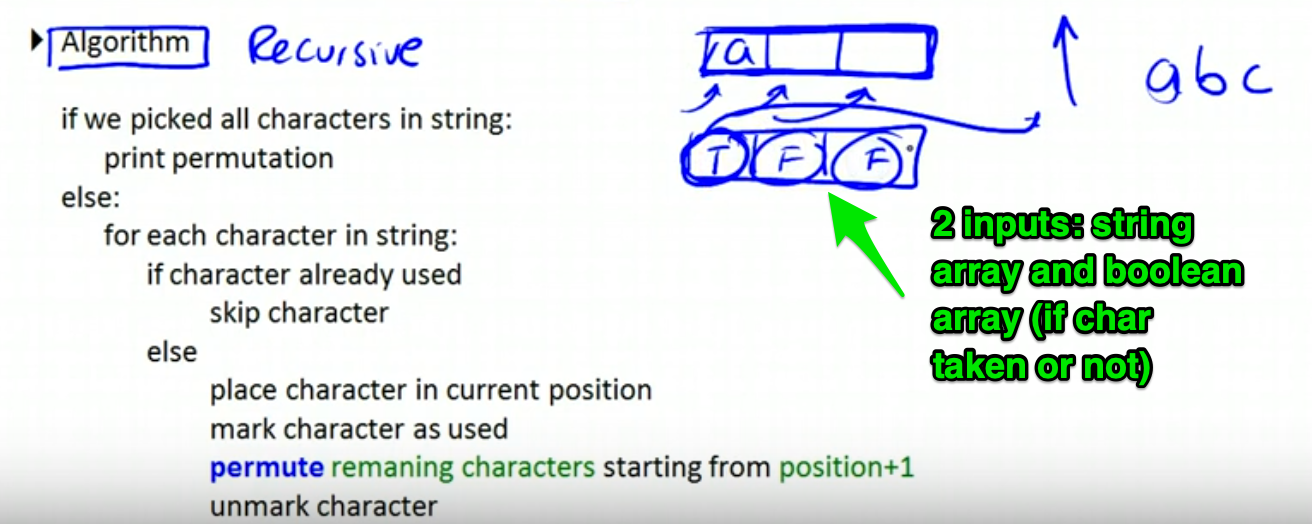

Inspired by solution: https://leetcode.com/problems/permutations-ii/discuss/419986/Simple-python-3-solution-beats-99.55-runtime-(52ms)

In [32]:
class Solution:
    def permuteUnique(self, nums):
        self.response=[]
        freq={}
        for x in nums:
            count=1
            if freq.get(x) is not None:
                count=freq.get(x)
                count=count+1
            freq.update({x: count})
            
        self.permuteUniqueUtil([None]*len(nums), freq, 0)
        return self.response
        
    def permuteUniqueUtil(self, result, freq, level):
        if level == len(result):
            self.response.append(list(result))
        else:
            for v in freq:
                if freq[v] < 1:
                    continue
                else:
                    result[level]=v
                    freq[v]=freq[v]-1
                    self.permuteUniqueUtil(result, freq, level+1)
                    freq[v]=freq[v]+1
                    
s=Solution()
s.permuteUnique([1, 1, 2])

[[1, 1, 2], [1, 2, 1], [2, 1, 1]]

Below is my crappy solution. Very bad.
Lazily used SET in the response to remove duplicates.

In [11]:
class Solution:
    def permuteUnique(self, nums):
        self.responseDict={}
        isAccessed=[False]*len(nums)
        result=[None]*len(nums)
        self.permuteUniqueUtil(nums, isAccessed, result, 0)
#         for i in range(0, len(self.response)):
#             self.response[i]=eval(self.response[i])
        return list(self.responseDict.values())
        
        
    def permuteUniqueUtil(self, nums, isAccessed, result, level):
        if level == len(nums):
            self.responseDict.update({repr(result):result})
        else:
            for i in range(0, len(nums)):
                if isAccessed[i]:
                    continue
                else:
                    result[level]=nums[i]
                    isAccessed[i]=True
                    self.permuteUniqueUtil(nums, isAccessed, result, level+1)
                    isAccessed[i]=False
                    
s=Solution()
s.permuteUnique([1,1,2])

[[2, 1, 1], [2, 1, 1], [2, 1, 1]]

https://leetcode.com/problems/permutations-ii/discuss/419759/Python3-simplest-solution

In [18]:
class Solution:
    def permuteUnique(self, nums):
        if len(nums) < 2:
            return [nums]

        ans, used = [], {}

        for i in range(len(nums)):
            if nums[i] not in used:
                suffixes = self.permuteUnique(nums[:i] + nums[i + 1:])
                for suffix in suffixes:
                    ans.append([nums[i]] + suffix)

                used[nums[i]] = 1
        return ans

s=Solution()
s.permuteUnique([1, 1, 3])

[[1, 1, 3], [1, 3, 1], [3, 1, 1]]